In [1]:
!pip install pycbc

     |████████████████████████████████| 6.7 MB 11.6 MB/s 
     |████████████████████████████████| 27.3 MB 25.3 MB/s 
     |████████████████████████████████| 52 kB 766 kB/s 
     |████████████████████████████████| 115 kB 41.0 MB/s 
     |████████████████████████████████| 1.6 MB 55.6 MB/s 
  Created wheel for lscsoft-glue: filename=lscsoft_glue-2.0.0-cp37-cp37m-linux_x86_64.whl size=416983 sha256=d9c45a91e07b440727de34fe579f5b6247e0663f1bc7d01a657baba65c83d6c7
  Stored in directory: /root/.cache/pip/wheels/9d/ed/9e/1f9cad5e15359dc17954b893dd486760b5cb1ffd97a8405d1e
  Created wheel for ligo-segments: filename=ligo_segments-1.3.0-cp37-cp37m-linux_x86_64.whl size=92285 sha256=08742e9097de2a14432a9f652691980baad56b8927867bb11cd7d84a0f081224
  Stored in directory: /root/.cache/pip/wheels/b7/cc/08/d877a20dafb946a7cf821c6d1a2895f1e227a54cef891c14d8
Successfully built lscsoft-glue ligo-segments


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


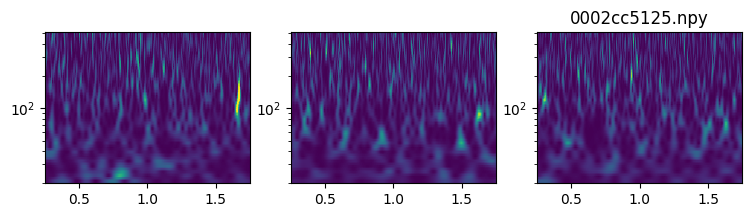

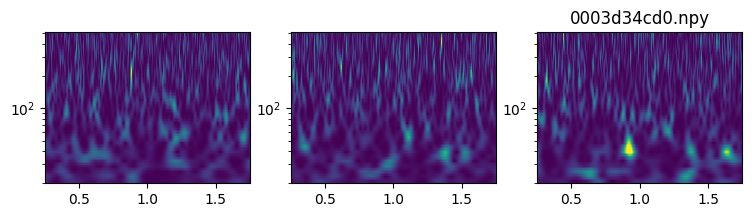

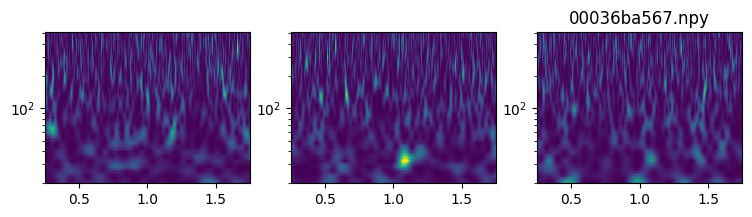

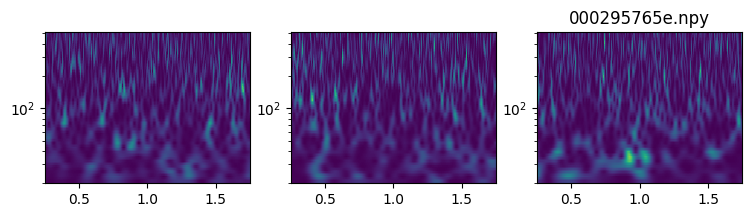

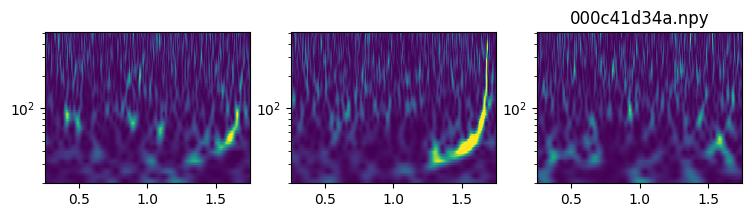

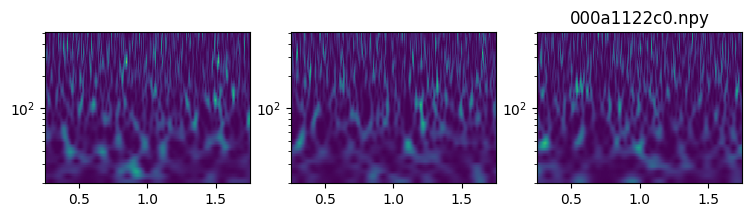

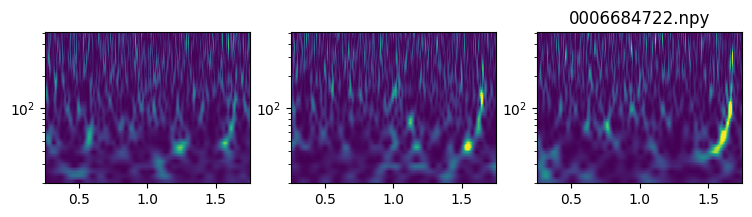

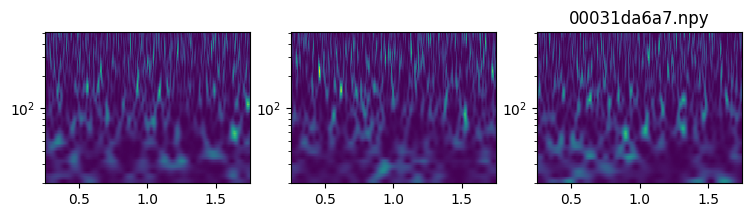

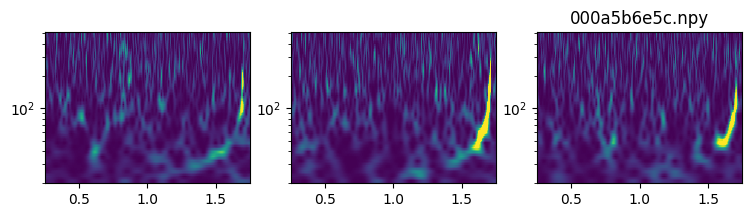

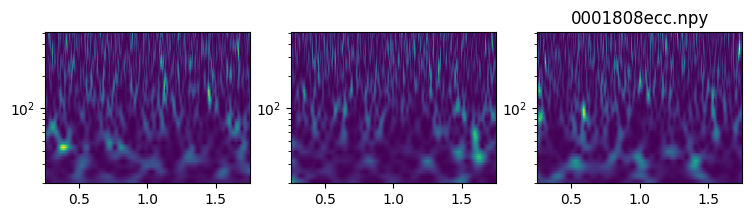

In [2]:
import numpy, pylab, glob, os
import pycbc.types

# Let's pick some files to plot
fnames = glob.glob('/kaggle/input/g2*/train/0/0/0/*.npy')[0:10]
for fname in fnames:
    
    # load the specific 2s sample
    dat = numpy.load(fname)
    
    fig, axes = pylab.subplots(1, 3, figsize=[9,2], dpi=100)
    pylab.title(os.path.basename(fname))
    for i in range(3):
        # convert the data to a TimeSeries instance
        ts = pycbc.types.TimeSeries(dat[i, :], epoch=0, delta_t=1.0/2048) 
        
        # whiten the data (i.e. normalize the noise power at different frequencies)
        ts = ts.whiten(0.125, 0.125)
        
        # calculate the qtransform
        time, freq, power = ts.qtransform(.002, logfsteps=100, qrange=(10, 10), frange=(20, 512))

        pylab.sca(axes[i])
        pylab.pcolormesh(time, freq, power, vmax=15, vmin=0)
        pylab.xlim(.25, 1.75)
        pylab.yscale('log')
    pylab.show()